<a href="https://colab.research.google.com/github/RadhaIlmulwar/EV-Market-Segmentation/blob/main/EV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score,silhouette_score,confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,PowerTransformer

In [2]:
data=pd.read_csv("dataset_2.csv")

In [3]:
data.columns.values.tolist()

['name', 'state', 'city', 'address', 'lattitude', 'longitude', 'type']

In [4]:
data.head()

,name,state,city,address,lattitude,longitude,type
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.9803,12.0
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.0818,12.0
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.2760,12.0
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.7218,12.0
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.7218,12.0


In [5]:
features = ['name', 'state', 'city', 'address', 'lattitude', 'longitude', 'type']

In [6]:
data.dropna(subset = features)

,name,state,city,address,lattitude,longitude,type
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.980300,12.0
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.081800,12.0
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.276000,12.0
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.721800,12.0
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.721800,12.0
...,...,...,...,...,...,...,...
1542,Tata Power,Kerala,Munnar,"Gokulam Park Munnar, Power House Road, South C...",10.0297934,77.045859,7.0
1543,Tata Power,Haryana,Gurgaon,"Vatika Town Square II, Sector 82, Sector 82, V...",28.3904593,76.959200,7.0
1544,Tata Power,Haryana,Gurgaon,"Zedex TATA, Sec 48, GF-26, NIHO Scottish Mall,...",28.411072,77.040546,7.0
1545,Tata Power,Jammu,Jammu,"Le ROI, Jammu, Railway Station, Jammu, Jammu &...",32.7064117,74.879203,7.0


In [7]:
data.describe()


,longitude,type
count,1.541000e+03,1539.000000
mean,1.105323e+05,9.020793
std,3.064996e+06,4.136436
min,8.058454e+00,6.000000
25%,7.562036e+01,7.000000
50%,7.721257e+01,7.000000
75%,7.847983e+01,11.000000
max,8.510551e+07,24.000000


In [8]:
label_encoder = LabelEncoder()
data['state'] = label_encoder.fit_transform(data['name'])
data['state'] = label_encoder.fit_transform(data['state'])
data['city'] = label_encoder.fit_transform(data['city'])
data['city'] = label_encoder.fit_transform(data['address'])
data['city'] = label_encoder.fit_transform(data['lattitude'])
data['city'] = label_encoder.fit_transform(data['longitude'])
data['type'] = label_encoder.fit_transform(data['type'])
data


,name,state,city,address,lattitude,longitude,type
0,Neelkanth Star DC Charging Station,804,502,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.980300,5
1,Galleria DC Charging Station,417,539,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.081800,5
2,Highway Xpress (Jaipur-Delhi) DC charging station,487,397,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.276000,5
3,Food Carnival DC Charging Station,393,826,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.721800,5
4,Food Carnival AC Charging Station,392,826,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.721800,5
...,...,...,...,...,...,...,...
1542,Tata Power,1017,522,"Gokulam Park Munnar, Power House Road, South C...",10.0297934,77.045859,1
1543,Tata Power,1017,489,"Vatika Town Square II, Sector 82, Sector 82, V...",28.3904593,76.959200,1
1544,Tata Power,1017,517,"Zedex TATA, Sec 48, GF-26, NIHO Scottish Mall,...",28.411072,77.040546,1
1545,Tata Power,1017,284,"Le ROI, Jammu, Railway Station, Jammu, Jammu &...",32.7064117,74.879203,1


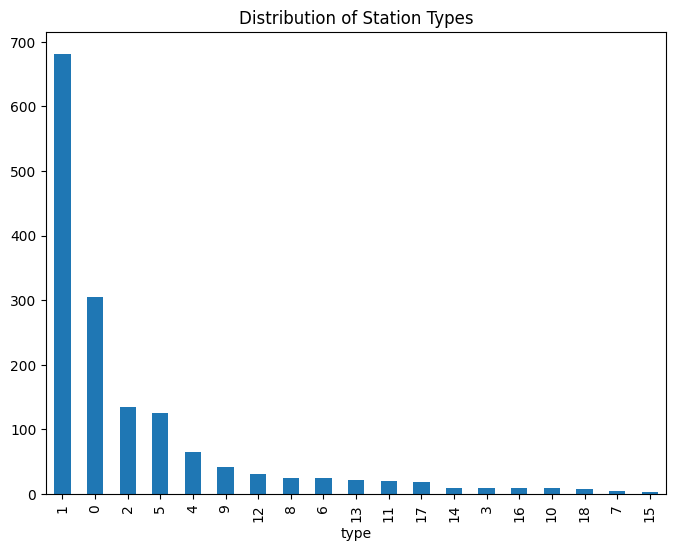

In [9]:
plt.figure(figsize=(8, 6))
data['type'].value_counts().plot(kind='bar')
plt.title("Distribution of Station Types")
plt.show()

In [10]:
value_counts = data['state'].value_counts()

In [13]:
data_encoded = pd.get_dummies(data, columns=['name','address','lattitude', 'longitude'])  # Perform one-hot encoding
X = data_encoded.drop('type', axis=1)
y = data_encoded['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

Accuracy: 0.5870967741935483


RandomForestClassifier(random_state=42)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Replace missing values in 'address' column with an empty string
data['address'].fillna('', inplace=True)

# Preprocess 'address' column
tfidf_vectorizer = TfidfVectorizer(max_features=100)  # Adjust max_features as needed
address_features = tfidf_vectorizer.fit_transform(data['address']).toarray()

# Convert the transformed features into a DataFrame
address_df = pd.DataFrame(address_features, columns=tfidf_vectorizer.get_feature_names_out())

# Concatenate the new address features with the original DataFrame
data = pd.concat([data, address_df], axis=1)

# Now you can drop the 'address' column and proceed with the machine learning model
X = data.drop(['type', 'address'], axis=1)
y = data['type']

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # or 'micro', 'macro', 'binary', etc.
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # or 'micro', 'macro', 'binary', etc.
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')  # or 'micro', 'macro', 'binary', etc.
print("F1-score:", f1)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.5870967741935483
Precision: 0.5870078291462266
Recall: 0.5870967741935483
F1-score: 0.5274972294936466
Confusion Matrix:
[[ 19  45   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 11 130   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2   2  17   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0]
 [  2   7   0   0   7   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  23   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  7   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0]
 [  1   0   3   0   0   0   0   3   0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:

accuracy_percentage = accuracy * 100
precision_percentage = precision * 100
recall_percentage = recall * 100
f1_percentage = f1 * 100

print("Accuracy (%):", accuracy_percentage)
print("Precision (%):", precision_percentage)
print("Recall (%):", recall_percentage)
print("F1-score (%):", f1_percentage)


Accuracy (%): 58.70967741935483
Precision (%): 58.700782914622664
Recall (%): 58.70967741935483
F1-score (%): 52.74972294936467
